# BRAZIL OIL PRODUCTION ANALYSIS

## Content
- [Introduction](#Introduction)
- [Objectives](#Objectives)
- [Tasks](#Tasks)
- [Exploratory Data Analysis](#EDA)
- [Analysis and Insights](#Analysis_and_Insights)
    - [Descriptive Statistics](#Descriptive_Statistics)
    - [Analysis By State](#Analysis_By_State)
    - [Analysis By Basin](#Analysis_By_Basin)
    - [Analysis By Operator](#Analysis_By_Operator)
    - [Production Correlations](#Production_Correlations)
- [Recommendations](#Recommendations)

## Introduction
This project analyzes the production of oil in Brazil in April 2016. The data provided offers an opportunity to develop insights into Brazil's Oil production patterns, and provide ANP with the information needed to report to the global energy bodies. The analyses focus on the production of petroleum, gases and water according to the various states, basins, and operators. 

## Objectives
Generate a report for ANP and the Energy Commision to show the performances of the various operators, basins and states.
Identify key values and insights to boost productivity.

## Tasks
- Prepare the data for Analysis
- Analyze data using python and generate a report
- Interpret trends and identify key areas
- Make recommendations or present findings

## EDA

In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Importing dataset
data=pd.read_csv('Oil production ANP.csv', encoding = 'latin1')

In [3]:
#viewing first five rows of data
data.head()

,state,basin,well_name_anp,well_name_operator,field,operator,contract_number,period,oil,condensate,petroleum,gas_associate,gas_non_associate,total_gas,volume_gas_royalties,water,installation_destination,installation_type,production_time
0,Rio Grande do Norte,Potiguar,7UB 0007D RNS,7UB 0007D RNS,UBARANA,Petrobras,4.800000e+14,2016/04,2.0014,0.0,2.0014,0.2453,0.0000,0.2453,7.36006,0.0168,PLATAFORMA DE UBARANA 1,UEP,456
1,Sergipe,Sergipe,7GA 0007D SES,7GA 0007D SES,GUARICEMA,Petrobras,4.800000e+14,2016/04,96.9803,0.0,96.9803,16.2989,0.0000,16.2989,0.00000,0.5826,PLATAFORMA PGA-01 DE GUARICEMA,UEP,717
2,Sergipe,Sergipe,1SES 0019DASE,1SES 0019DASE,TATUI,Petrobras,4.800000e+14,2016/04,78.7815,0.0,78.7815,2.2412,0.0000,2.2412,66.85610,7.0341,Estação Prod. Atalaia (EPA),INSTALACAO EMB/DESEMB,704
3,Sergipe,Sergipe,7CB 0010D SES,7CB 0010D SES,CAIOBA,Petrobras,4.800000e+14,2016/04,0.0000,0.0,0.0000,0.0000,14.8793,14.8793,445.10182,0.0000,PLATAFORMA PCB-01 DE CAIOBA,UEP,700
4,Sergipe,Sergipe,7GA 0025D SES,7GA 0025D SES,GUARICEMA,Petrobras,4.800000e+14,2016/04,477.1343,0.0,477.1343,63.8908,0.0000,63.8908,0.00000,0.8447,PLATAFORMA PGA-03 DE GUARICEMA,UEP,713


In [4]:
#Getting the number of columns and row
data.shape

(805, 19)

In [5]:
#checking for missing values
data.isna().sum()

state                       0
basin                       0
well_name_anp               0
well_name_operator          0
field                       0
operator                    0
contract_number             0
period                      0
oil                         0
condensate                  0
petroleum                   0
gas_associate               0
gas_non_associate           0
total_gas                   0
volume_gas_royalties        0
water                       0
installation_destination    0
installation_type           0
production_time             0
dtype: int64

In [6]:
#checking for duplicates
duplicate_data = data.duplicated(keep =False)
duplicated_data = data[duplicate_data].sort_values('well_name_anp')
print(duplicated_data)

Empty DataFrame
Columns: [state, basin, well_name_anp, well_name_operator, field, operator, contract_number, period, oil, condensate, petroleum, gas_associate, gas_non_associate, total_gas, volume_gas_royalties, water, installation_destination, installation_type, production_time]
Index: []


In [7]:
dups = data['well_name_anp'].duplicated(keep =False)
dupss = data[dups]
dupss

,state,basin,well_name_anp,well_name_operator,field,operator,contract_number,period,oil,condensate,petroleum,gas_associate,gas_non_associate,total_gas,volume_gas_royalties,water,installation_destination,installation_type,production_time
95,Rio de Janeiro,Campos,7PM 0017D RJS,7PM 0017D RJS,TRILHA,Petrobras,4.800000e+14,2016/04,0.4317,0.0,0.4317,0.0057,0.0,0.0057,0.17190,0.4575,PLATAFORMA DE PAMPO-1,UEP,2
96,Rio de Janeiro,Campos,7PM 0017D RJS,7PM 0017D RJS,BADEJO,Petrobras,4.800000e+14,2016/04,17.9874,0.0,17.9874,0.2393,0.0,0.2393,7.16770,19.0655,PLATAFORMA DE PAMPO-1,UEP,71
97,Rio de Janeiro,Campos,7PM 0017D RJS,7PM 0017D RJS,PAMPO,Petrobras,4.800000e+14,2016/04,28.7798,0.0,28.7798,0.3829,0.0,0.3829,11.46843,30.5048,PLATAFORMA DE PAMPO-1,UEP,113
98,Rio de Janeiro,Campos,7PM 0017D RJS,7PM 0017D RJS,LINGUADO,Petrobras,4.800000e+14,2016/04,132.6748,0.0,132.6748,1.7651,0.0,1.7651,0.00000,140.6271,PLATAFORMA DE PAMPO-1,UEP,522
103,Rio de Janeiro,Campos,7PM 0021D RJS,7PM 0021D RJS,PAMPO,Petrobras,4.800000e+14,2016/04,158.5539,0.0,158.5539,1.4475,0.0,1.4475,43.35802,1614.1463,PLATAFORMA DE PAMPO-1,UEP,613
104,Rio de Janeiro,Campos,7PM 0021D RJS,7PM 0021D RJS,LINGUADO,Petrobras,4.800000e+14,2016/04,1.4722,0.0,1.4722,0.0134,0.0,0.0134,0.00000,14.9880,PLATAFORMA DE PAMPO-1,UEP,6
256,Rio de Janeiro,Campos,7PM39HRJS,7PM39HRJS,PAMPO,Petrobras,4.800000e+14,2016/04,293.9186,0.0,293.9186,2.7309,0.0,2.7309,81.80090,3109.9823,PLATAFORMA DE PAMPO-1,UEP,565
257,Rio de Janeiro,Campos,7PM39HRJS,7PM39HRJS,LINGUADO,Petrobras,4.800000e+14,2016/04,2.7291,0.0,2.7291,0.0254,0.0,0.0254,0.00000,28.8775,PLATAFORMA DE PAMPO-1,UEP,5
261,Rio de Janeiro,Campos,7PM 0038D RJS,7PM 0038D RJS,PAMPO,Petrobras,4.800000e+14,2016/04,257.8120,0.0,257.8120,2.2655,0.0,2.2655,67.85881,480.8568,PLATAFORMA DE PAMPO-1,UEP,328
262,Rio de Janeiro,Campos,7PM 0038D RJS,7PM 0038D RJS,LINGUADO,Petrobras,4.800000e+14,2016/04,2.3939,0.0,2.3939,0.0210,0.0,0.0210,0.00000,4.4649,PLATAFORMA DE PAMPO-1,UEP,3


In [8]:
#checking the various datatypes
data.dtypes

state                        object
basin                        object
well_name_anp                object
well_name_operator           object
field                        object
operator                     object
contract_number             float64
period                       object
oil                         float64
condensate                  float64
petroleum                   float64
gas_associate               float64
gas_non_associate           float64
total_gas                   float64
volume_gas_royalties        float64
water                       float64
installation_destination     object
installation_type            object
production_time               int64
dtype: object

In [9]:
#changing datatype of contract number and period columns
data['period'] = data['period'].astype('datetime64')
data['contract_number'] = data['contract_number'].astype('object')

In [10]:
#rechecking data types to see changes
data.dtypes

state                               object
basin                               object
well_name_anp                       object
well_name_operator                  object
field                               object
operator                            object
contract_number                     object
period                      datetime64[ns]
oil                                float64
condensate                         float64
petroleum                          float64
gas_associate                      float64
gas_non_associate                  float64
total_gas                          float64
volume_gas_royalties               float64
water                              float64
installation_destination            object
installation_type                   object
production_time                      int64
dtype: object

In [11]:
#getting a numerical summary of the data
data.describe()

,oil,condensate,petroleum,gas_associate,gas_non_associate,total_gas,volume_gas_royalties,water,production_time
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2641.292681,11.581130,2652.873811,68.457012,21.971361,90.428374,2019.467373,2239.195023,579.048447
std,4960.586277,95.366994,4955.329799,195.840813,149.514620,240.200966,5401.306447,3614.255651,222.585947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.952300,0.000000,123.193300,0.965000,0.000000,1.311700,34.824820,25.665800,551.000000
50%,643.843600,0.000000,678.896900,8.266900,0.000000,12.277900,302.560310,733.086800,699.000000
75%,2863.504100,0.000000,2863.504100,44.172100,0.000000,56.029000,1440.385790,2873.265300,720.000000
max,35488.409400,1548.299600,35488.409400,1832.626000,1796.496400,1832.626000,53894.892100,23420.753100,720.000000


## Analysis_and_Insights

## Descriptive_Statistics

In [12]:
#finding the number of unique values under each column
data.nunique()

state                         8
basin                         9
well_name_anp               788
well_name_operator          788
field                        82
operator                      7
contract_number               3
period                        1
oil                         737
condensate                   31
petroleum                   766
gas_associate               748
gas_non_associate            33
total_gas                   779
volume_gas_royalties        766
water                       732
installation_destination    111
installation_type             2
production_time             245
dtype: int64

**Brazil's oil industry consists of 7 operators operating 82 fields across 8 states and 9 basins. They make use of 2 installation types in the production of petroleum and natural gas. Petroleum from these 788 wells is made up of oil and condensates, and the natural gas from these wells consists of associated gas and non associated gas. Another significant product of these production processes is water**

In [13]:
#findind total production for crude for the entire field
totalOil = data['oil'].sum()
print("The total oil produced in April 2016 was "+"{:.2f}".format(totalOil)+" bbl/day")

totalCondensate = data['condensate'].sum()
print("The total condensate produced in April 2016 was "+"{:.2f}".format(totalCondensate)+" bbl/day")

totalPetroleum = data['petroleum'].sum()
print("The total Petroleum produced in April 2016 was "+"{:.2f}".format(totalPetroleum)+" bbl/day")

The total oil produced in April 2016 was 2126240.61 bbl/day
The total condensate produced in April 2016 was 9322.81 bbl/day
The total Petroleum produced in April 2016 was 2135563.42 bbl/day


In [14]:
#finding total gas produced for the entire field
totalAssociate = data['gas_associate'].sum()
print("The total associated gas produced in April 2016 was "+"{:.2f}".format(totalAssociate)+" mmcf/day")

totalNonassociate = data['gas_non_associate'].sum()
print("The total nonassociated gas produced in April 2016 was "+"{:.2f}".format(totalNonassociate)+" mmcf/day")

totalGas = data['total_gas'].sum()
print("The overall total gas produced in April 2016 was "+"{:.2f}".format(totalGas)+" mmcf/day")

The total associated gas produced in April 2016 was 55107.89 mmcf/day
The total nonassociated gas produced in April 2016 was 17686.95 mmcf/day
The overall total gas produced in April 2016 was 72794.84 mmcf/day


In [15]:
#finding the total water produced over the period
totalWater = data['water'].sum()
print("The total water produced in April 2016 was "+"{:.2f}".format(totalWater)+" bbl/day")

The total water produced in April 2016 was 1802551.99 bbl/day


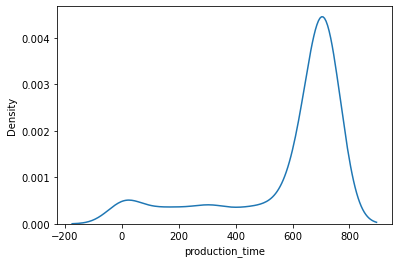

In [16]:
#visualizing production time
sns.kdeplot(data['production_time'],)
plt.show()

In [17]:
#calculating average production time for the entire data
avg_prodTime = data['production_time'].mean()
avg_prodTime

579.048447204969

**The average production time for all the wells in Brazil in April 2016 was 579.05 hours**

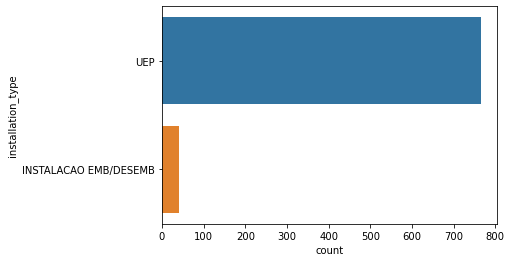

In [18]:
#number of wells per installation type
sns.countplot(y=data['installation_type'])
plt.show()

In [19]:
countInstallations = data.groupby('installation_type')[['installation_type']].count()
countInstallations

,installation_type
installation_type,
INSTALACAO EMB/DESEMB,40
UEP,765


**The most used installation type in brazillian oil and gas wells is UEP with 14 times more installations than INSTALACAO EMB/DESEMB**

### Analysis_By_State
This focuses on generating charts that give life to the data from the perspective of each state. This provides an opportunity to establish and compare relationships between variables. To do this, the following were determined: 

- Total produced gas by state 
- Total produced water by state 
- Average production time by state 
- Total produced petroleum by state 
- Average duration by state 

In [20]:
#finding the total petroleum produced for each state
petroleum_per_state = data.groupby('state')[['petroleum']].sum().sort_values('petroleum',ascending=False)
petroleum_per_state.reset_index()

,state,petroleum
0,Rio de Janeiro,1.437436e+06
1,Espírito Santo,3.925615e+05
2,São Paulo,2.851564e+05
3,Sergipe,7.568554e+03
4,Rio Grande do Norte,6.546680e+03
5,Ceará,5.493000e+03
6,Bahia,6.730751e+02
7,Alagoas,1.281155e+02


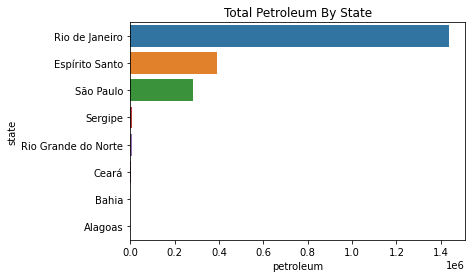

In [21]:
#visualizing petroleum_per_state
sns.barplot(x='petroleum',y='state',data = petroleum_per_state.reset_index()).set(title = "Total Petroleum By State")
plt.show()

In [22]:
#finding the total gas produced for each state
gas_per_state = data.groupby('state')[['total_gas']].sum().sort_values('total_gas',ascending=False)
gas_per_state.reset_index()

,state,total_gas
0,Rio de Janeiro,37629.4934
1,São Paulo,15632.9495
2,Espírito Santo,10580.6073
3,Bahia,5971.0504
4,Sergipe,2437.3093
5,Rio Grande do Norte,256.4545
6,Alagoas,163.5935
7,Ceará,123.3831


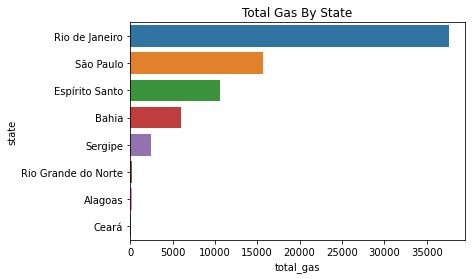

In [23]:
#visualizing gas_per_state
sns.barplot(x='total_gas',y='state',data = gas_per_state.reset_index()).set(title = "Total Gas By State")
plt.show()

In [24]:
#finding the total water produced for each state
water_per_state = data.groupby('state')[['water']].sum().sort_values('water',ascending=False)
water_per_state.reset_index()

,state,water
0,Rio de Janeiro,1.351639e+06
1,Espírito Santo,3.800143e+05
2,São Paulo,3.186692e+04
3,Rio Grande do Norte,2.622686e+04
4,Ceará,1.028408e+04
5,Bahia,2.014500e+03
6,Sergipe,4.849380e+02
7,Alagoas,2.172290e+01


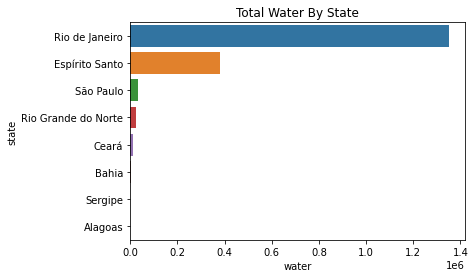

In [25]:
#visualizing water_per_state
sns.barplot(x='water',y='state',data = water_per_state.reset_index()).set(title = "Total Water By State")
plt.show()

In [26]:
#finding the average production time for each state
prodTime_per_state = data.groupby('state')[['production_time']].mean().sort_values('production_time',ascending=False)
prodTime_per_state.reset_index()

,state,production_time
0,Ceará,705.242424
1,Sergipe,671.571429
2,Rio Grande do Norte,669.152778
3,Alagoas,629.000000
4,Espírito Santo,601.085714
5,Bahia,571.529412
6,Rio de Janeiro,553.138739
7,São Paulo,534.727273


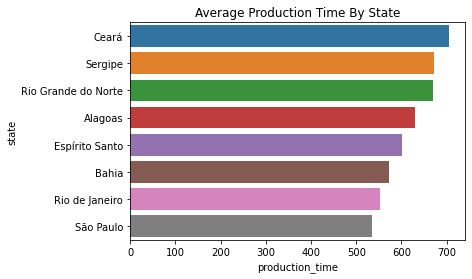

In [27]:
#visualizing prodTime_per_state
sns.barplot(x='production_time',y='state',data = prodTime_per_state.reset_index()).set(title = "Average Production Time By State")
plt.show()

The production wells in Rio de Janeiro were the most active wells: they produced a total of 37.6K bbl/day of gas, 1.35M bbl/day of water and 1.44M bbl/day of petroleum. However, the average production time spent in this state was the second lowest at 553.14 hours. Ceara had the highest average production time with 705.24 hours, but the state managed the lowest amount of gas produced (0.1K mmcf), the third lowest amount of petroleum produced (5.4K bbl/day), and the fourth lowest water produced (10.28K bbl/day). Sao Paulo was the second highest producer of gas, and third highest producer of petroleum and water. Notably, the production of water at the wells in Sao Paolo was about a tenth of the production of water in Espirito Santo and a one-forty-third of produced water in Rio de Janeiro – Rio de Janeiro and Espirito Santo being the other top producing states in Brazil. 

### Analysis_By_Basin
To further understand production in Brazil in April 2016, analysis of production was done by basins. The following were the parameters for the analyses: 

- Average production time by basin 
- Total Petroleum by basin 
- Total gas produced by basin 
- Total water produced by basin

In [28]:
#finding the total petroleum produced for each basin
petroleum_per_basin = data.groupby('basin')[['petroleum']].sum().sort_values('petroleum',ascending=False)
petroleum_per_basin.reset_index()

,basin,petroleum
0,Campos,1.468810e+06
1,Santos,6.234681e+05
2,Espírito Santo,2.287592e+04
3,Sergipe,7.568554e+03
4,Potiguar,6.546680e+03
5,Ceará,5.493000e+03
6,Camamu,4.185067e+02
7,Recôncavo,2.545684e+02
8,Alagoas,1.281155e+02


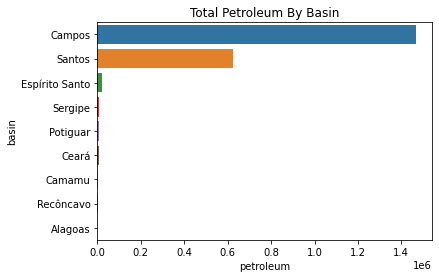

In [29]:
#Visualizing petroleum_per_basin
sns.barplot(x='petroleum',y='basin',data = petroleum_per_basin.reset_index()).set(title = "Total Petroleum By Basin")
plt.show()

In [30]:
#finding the total gas produced for each basin
gas_per_basin = data.groupby('basin')[['total_gas']].sum().sort_values('total_gas',ascending=False)
gas_per_basin.reset_index()

,basin,total_gas
0,Santos,34371.0520
1,Campos,27169.3917
2,Camamu,5953.6258
3,Sergipe,2437.3093
4,Espírito Santo,2302.6065
5,Potiguar,256.4545
6,Alagoas,163.5935
7,Ceará,123.3831
8,Recôncavo,17.4246


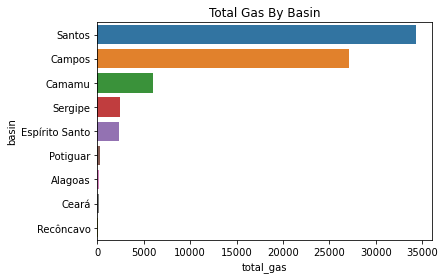

In [31]:
#Visualizing gas_per_basin
sns.barplot(x='total_gas',y='basin',data = gas_per_basin.reset_index()).set(title = "Total Gas By Basin")
plt.show()

In [32]:
#finding the total water produced for each basin
water_per_basin = data.groupby('basin')[['water']].sum().sort_values('water',ascending=False)
water_per_basin.reset_index()

,basin,water
0,Campos,1.673180e+06
1,Espírito Santo,5.453697e+04
2,Santos,3.580333e+04
3,Potiguar,2.622686e+04
4,Ceará,1.028408e+04
5,Recôncavo,1.933221e+03
6,Sergipe,4.849380e+02
7,Camamu,8.127900e+01
8,Alagoas,2.172290e+01


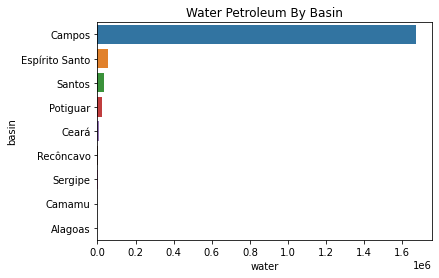

In [33]:
#Visualizing water_per_basin
sns.barplot(x='water',y='basin',data = water_per_basin.reset_index()).set(title = "Water Petroleum By Basin")
plt.show()

In [34]:
#finding the average production time for each basin
prodTime_per_basin = data.groupby('basin')[['production_time']].mean().sort_values('production_time',ascending=False)
prodTime_per_basin.reset_index()

,basin,production_time
0,Recôncavo,706.545455
1,Espírito Santo,706.000000
2,Ceará,705.242424
3,Sergipe,671.571429
4,Potiguar,669.152778
5,Alagoas,629.000000
6,Campos,566.602410
7,Santos,434.000000
8,Camamu,324.000000


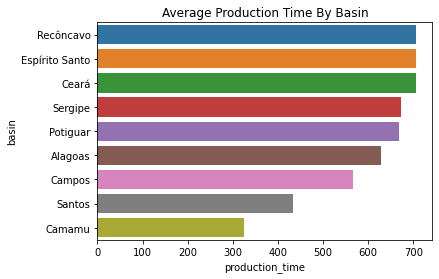

In [35]:
#Visualizing prodTime_per_basin
sns.barplot(x='production_time',y='basin',data = prodTime_per_basin.reset_index()).set(title = "Average Production Time By Basin")
plt.show()

Campos produce the most petroleum and the most water with 1.47M bbl/day and 1.67M bbl/day respectively. Campos was also the second largest producer of gas with 27.17K mmcf/day. Santos and Espirito Santo were the next best producers of petroleum and water but were still far off Campos. However, the wells in the Santos basin produced the most water with 34.37K bbl/day. Alages was the least performing basin for petroleum and water while Reconcavo produced the least amount of gas with 17.4 mmcf/day. The production outputs were not a reflection of the production hours as Reconcavo had an average of 706.55 hours of production compared to Campos’ 566.6 hours and Santos’ 434 hours. 

### Analysis_By_Operator
To observe trends across the operators, the following parameters were used: 
- Total produced petroleum by operator 
- Total produced gas by operator 
- Total produced water by operator 
- Average production time by operator

In [36]:
#finding the total petroleum produced for each operator
petroleum_per_operator = data.groupby('operator')[['petroleum']].sum().sort_values('petroleum',ascending=False)
petroleum_per_operator.reset_index()

,operator,petroleum
0,Petrobras,2.031576e+06
1,Shell Brasil,5.058128e+04
2,Statoil Brasil O&G,2.223465e+04
3,Chevron Frade,2.205815e+04
4,Petro Rio,8.875044e+03
5,UP Petróleo,2.380148e+02
6,OGX,0.000000e+00


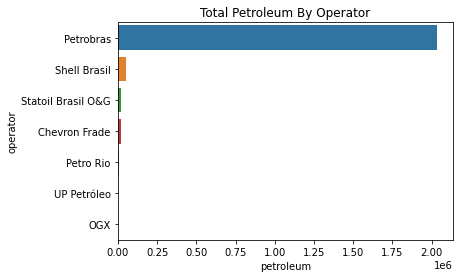

In [37]:
#Visualizing petroleum_per_operator
sns.barplot(x='petroleum',y='operator',data = petroleum_per_operator.reset_index()).set(title = "Total Petroleum By Operator")
plt.show()

In [38]:
#finding the total gas produced for each operator
gas_per_operator = data.groupby('operator')[['total_gas']].sum().sort_values('total_gas',ascending=False)
gas_per_operator.reset_index()

,operator,total_gas
0,Petrobras,71926.5567
1,Shell Brasil,551.2926
2,Chevron Frade,258.7740
3,Statoil Brasil O&G,30.0123
4,Petro Rio,23.9384
5,UP Petróleo,4.2670
6,OGX,0.0000


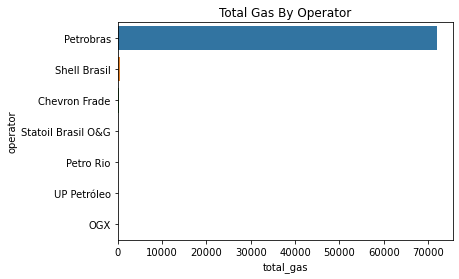

In [39]:
#Visualizing gas_per_operator
sns.barplot(x='total_gas',y='operator',data = gas_per_operator.reset_index()).set(title = "Total Gas By Operator")
plt.show()

In [40]:
#finding the total water produced for each operator
water_per_operator = data.groupby('operator')[['water']].sum().sort_values('water',ascending=False)
water_per_operator.reset_index()

,operator,water
0,Petrobras,1.660489e+06
1,Shell Brasil,5.958698e+04
2,Petro Rio,4.153913e+04
3,Statoil Brasil O&G,2.233968e+04
4,Chevron Frade,1.859605e+04
5,UP Petróleo,1.654200e+00
6,OGX,0.000000e+00


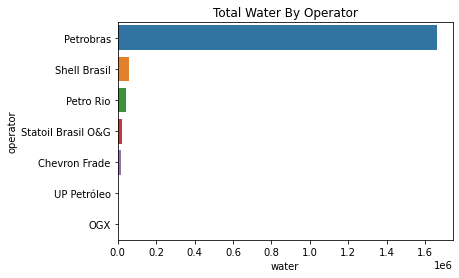

In [41]:
#Visualizing water_per_operator
sns.barplot(x='water',y='operator',data = water_per_operator.reset_index()).set(title = "Total Water By Operator")
plt.show()

In [42]:
#finding the average production time for each operator
prodTime_per_operator = data.groupby('operator')[['production_time']].mean().sort_values('production_time',ascending=False)
prodTime_per_operator.reset_index()

,operator,production_time
0,Petrobras,611.028050
1,Chevron Frade,590.363636
2,Petro Rio,554.500000
3,UP Petróleo,333.000000
4,Shell Brasil,327.578947
5,Statoil Brasil O&G,140.909091
6,OGX,0.000000


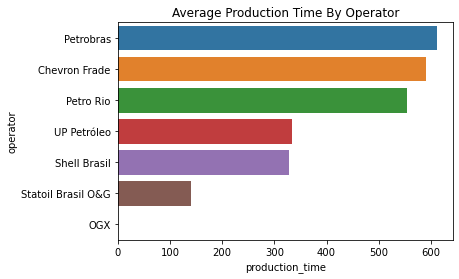

In [43]:
#Visualizing prodtime_per_operator
sns.barplot(x='production_time',y='operator',data = prodTime_per_operator.reset_index()).set(title = "Average Production Time By Operator")
plt.show()

Petrobras had the highest petroleum produced, water produced, total gas produced and average production hour with 2.03M bbl/day, 1.66MM bbl/day, 71.943K mmfc/day and 611.03 hours respectively. The analysis suggests OGX had no production in April 2016. Shell Brazil was the second highest producing operator although the gap between them and Petrobras was enormous suggesting the Brazilian oil sector is dominated by Petrobras. 

### Production_Correlations
The following analyses focus on determining if one prouction output affects the other. The correlation values are followed by graphs to show these relationships

In [44]:
#determining the correlation between petroleum produced and production_time
prodPetrol = data['petroleum'].corr(data['production_time'])
print("Correlation Between Petroleum and production time is: " + str(prodPetrol))

Correlation Between Petroleum and production time is: 0.01612278866594921


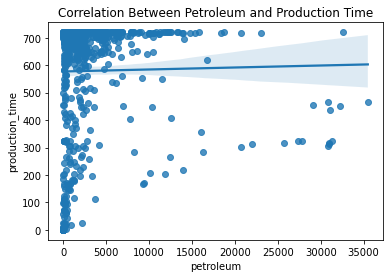

In [45]:
#plotting prodPetrol correlation
sns.regplot(x=data['petroleum'], y=data['production_time']).set(title="Correlation Between Petroleum and Production Time")
plt.show()

In [46]:
#determining the correlation between petroleum produced and total gas produced
petrolGas = data['petroleum'].corr(data['total_gas'])
print("Correlation between petroleum and total gas produced is: " + str(petrolGas))

Correlation between petroleum and total gas produced is: 0.6634970812435302


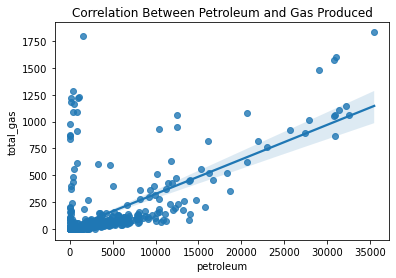

In [47]:
#plotting petrolGas correlation
sns.regplot(x=data['petroleum'], y=data['total_gas']).set(title="Correlation Between Petroleum and Gas Produced")
plt.show()

In [48]:
#determining the correlation between petroleum produced and water produced
petrolWater = data['petroleum'].corr(data['water'])
print("Correlation between petroleum and water produced is: " + str(petrolWater))

Correlation between petroleum and water produced is: 0.0920549016683173


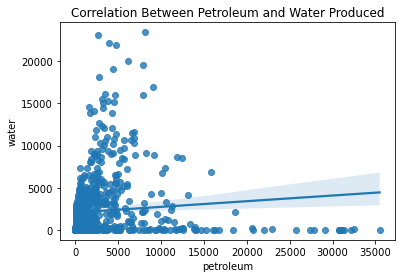

In [49]:
#plotting petrolWater correlation
sns.regplot(x=data['petroleum'], y=data['water']).set(title="Correlation Between Petroleum and Water Produced")
plt.show()

## Recommendations
Review production hours allocated for the various states and basins. Some wells with low volumes of produced petroleum and gas have high average production hours; this is not an efficient use of resources. 

Wells in Sao Paolo should be the point of focus when trying to minimize the production of water while maintaining good production of petroleum and gas.

## Conclusion
The Brazilian oil sector is dominated by Petrobras across multiple states and basins. Identifying ratio of produced petroleum to produced water will help understand which wells to cut back on when trying to reduce production of water.

OGX operates with no petroleum products suggesting this operator is now setting up in Brazil.



[Back To Top](#Content)